In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from Project.robot import Robot
from Project.control import *
from Project.cubicpath import *
from Project.utils import *

#Magic to enable matplotlib widgets
%matplotlib inline
plt.rcParams['figure.figsize'] = [10*2/2.54, 8*2/2.54]
matplotlib.rcParams['figure.dpi']=160

In [3]:
# DEFINE ROBOTS
R1 = Robot('Leader')
R2 = Robot('Follower')
R3 = Robot('Follower')
R2.set_robot_to_follow(R1)
R3.set_robot_to_follow(R2)


R1.set_initial_state([0, 0, 0])
R2.set_initial_state([-1, 1, 0])
R3.set_initial_state([-1,-1,0])

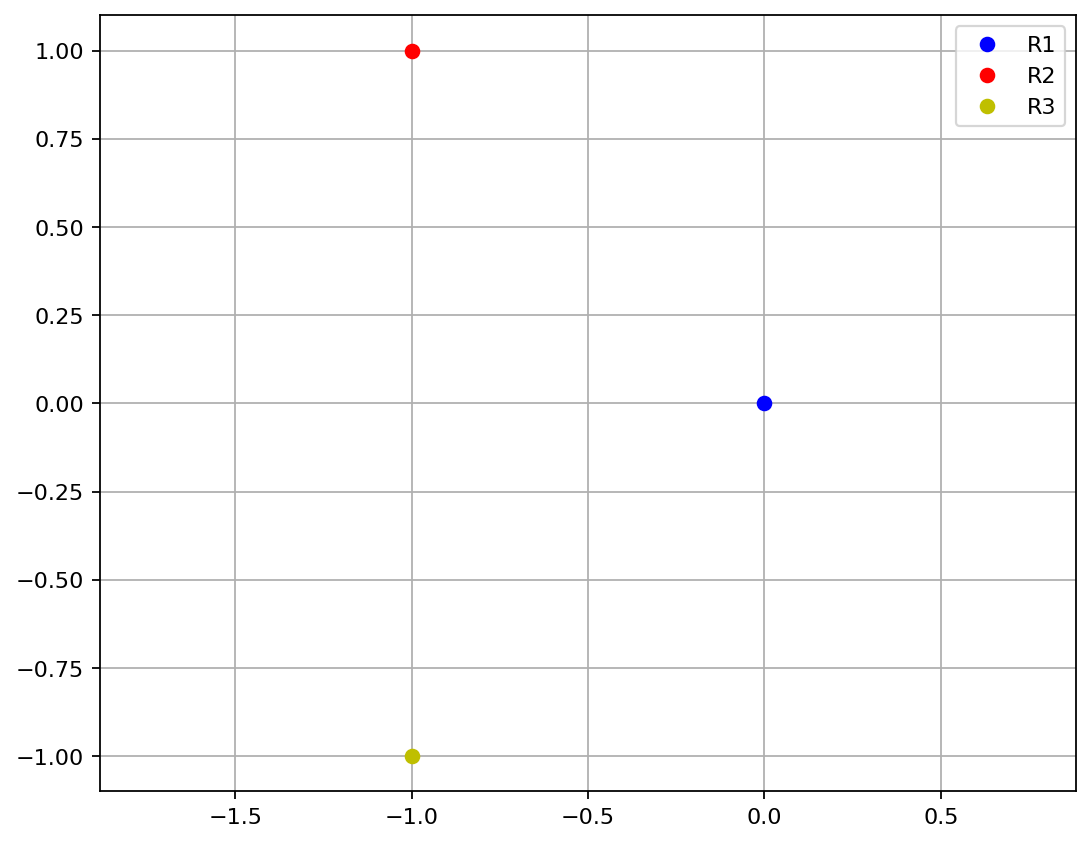

In [5]:
plt.figure()
plt.plot(R1.get_initial_state()[0],R1.get_initial_state()[1],'bo',lw = 4)
plt.plot(R2.get_initial_state()[0],R2.get_initial_state()[1],'ro',lw = 4)
plt.plot(R3.get_initial_state()[0],R3.get_initial_state()[1],'yo',lw = 4)
plt.axis('equal')
plt.grid()
plt.legend(['R1','R2','R3'])


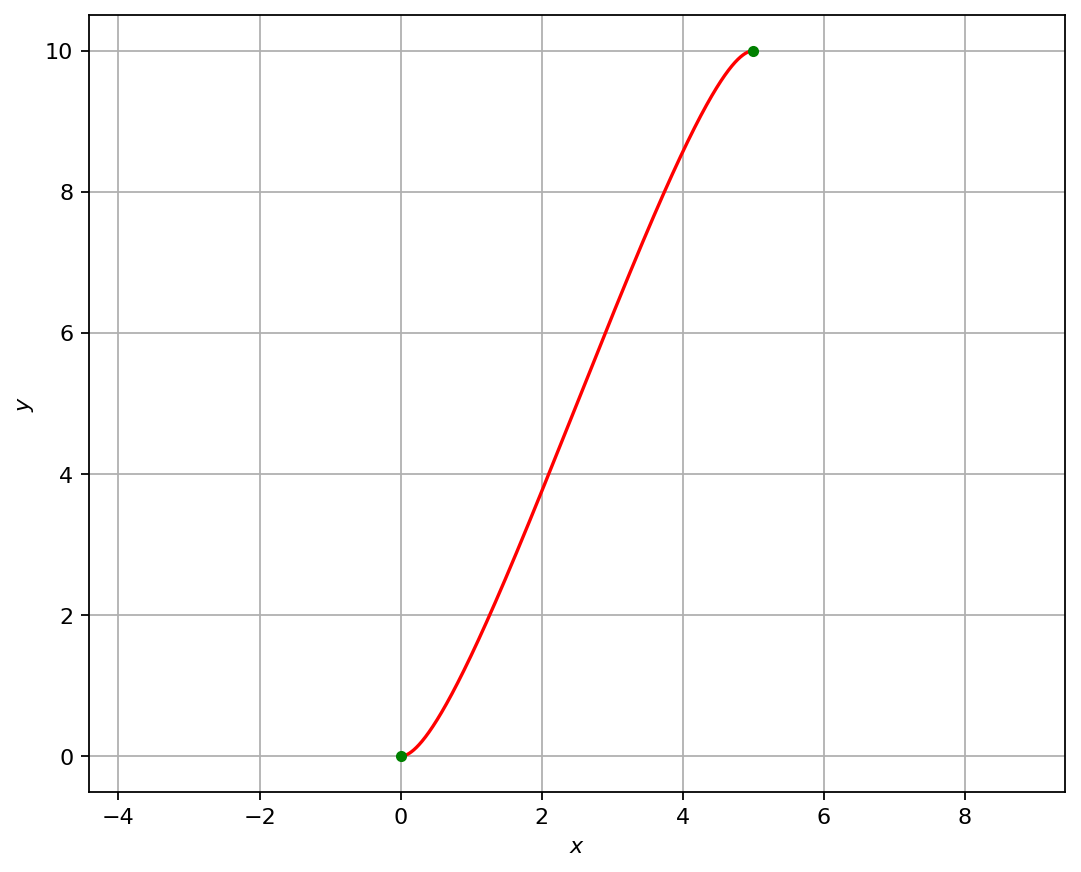

In [7]:
# LEADER PATH TO FOLLOW
t = np.linspace(0, 20, 1000)
waypoints = np.array([[0,0,0], [5,10., 0]])
k = 3 # Initial and Final Speed
path = compute_path_from_waypoints(waypoints, k,t)
R1.set_time(t)
R1.set_path(path)
plot_path(path)

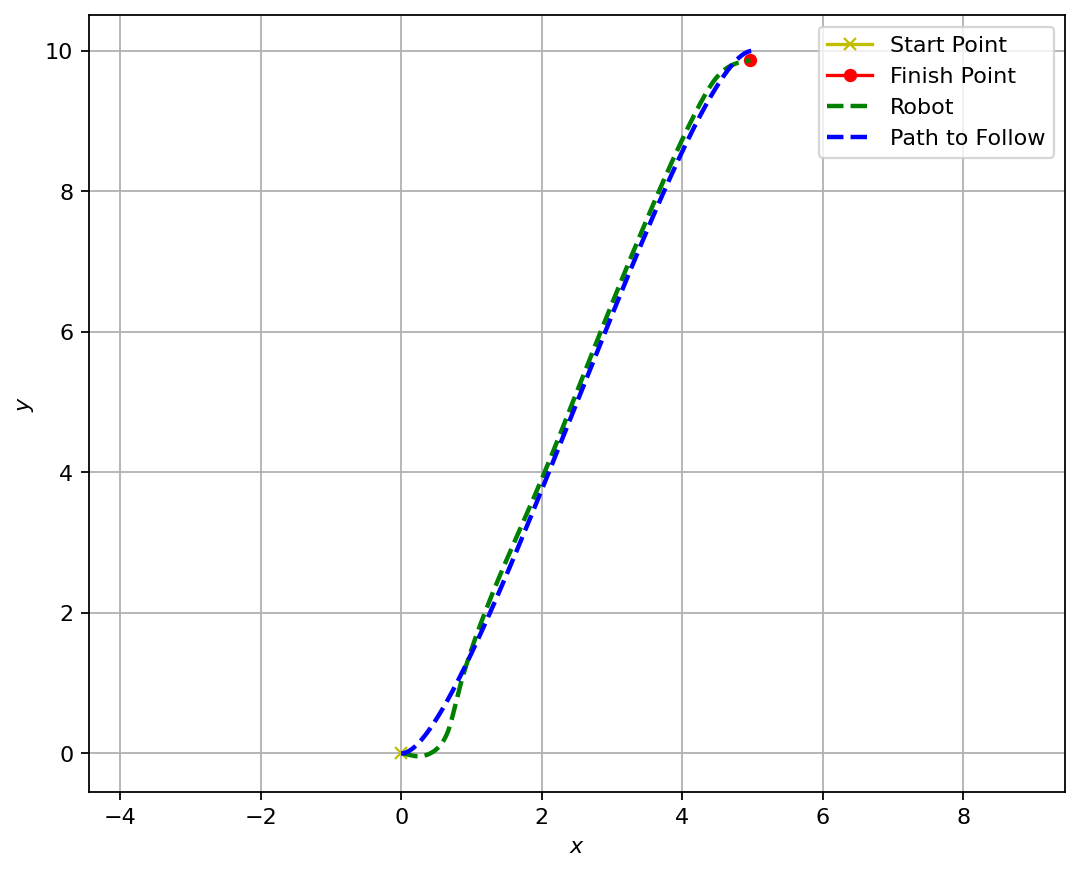

In [15]:
# CONTROL IMPLEMENTATION
C1 = TrajectoryTracking_Control(10,1, 10)
R1.set_control_obj(C1)
R1.simulation()
plot_xy(R1.get_x(), R1.get_y(), path, None, None)


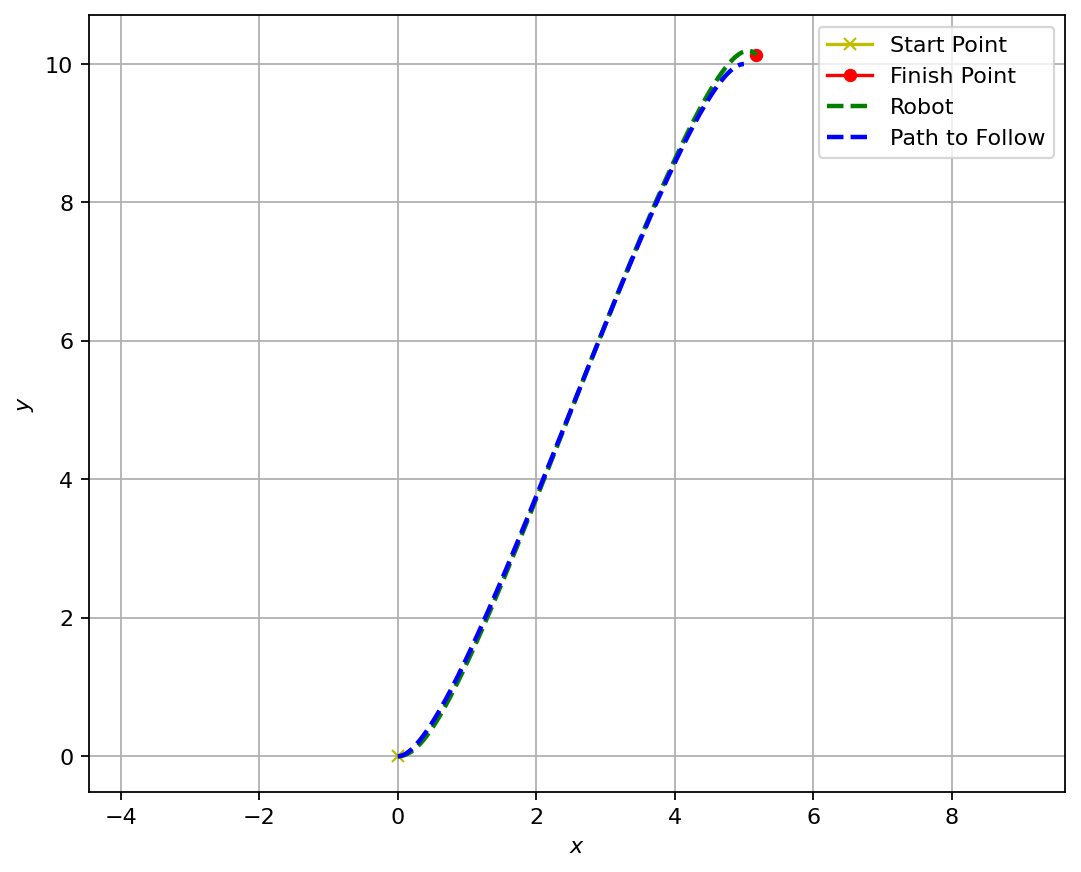

In [7]:
C2 = I_O_Linearization_Control(1,1,0.1,0.1)
C2.set_b(0.2)
R1.set_control_obj(C2)
R1.simulation()
plot_xy(R1.get_x(), R1.get_y(), path, None, None)


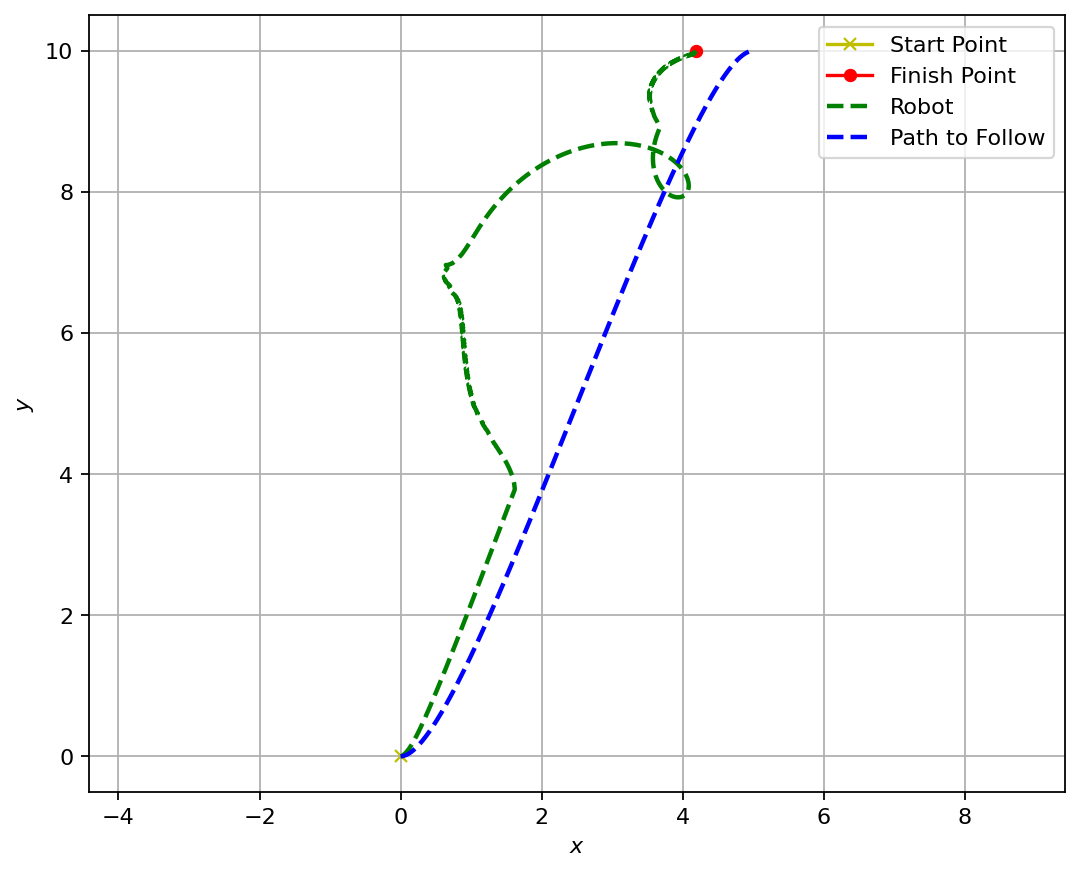

In [47]:
C3 = CartesianRegulator_Control(2, 25)
R1.set_control_obj(C3)
R1.simulation()
plot_xy(R1.get_x(), R1.get_y(), path, None, None)

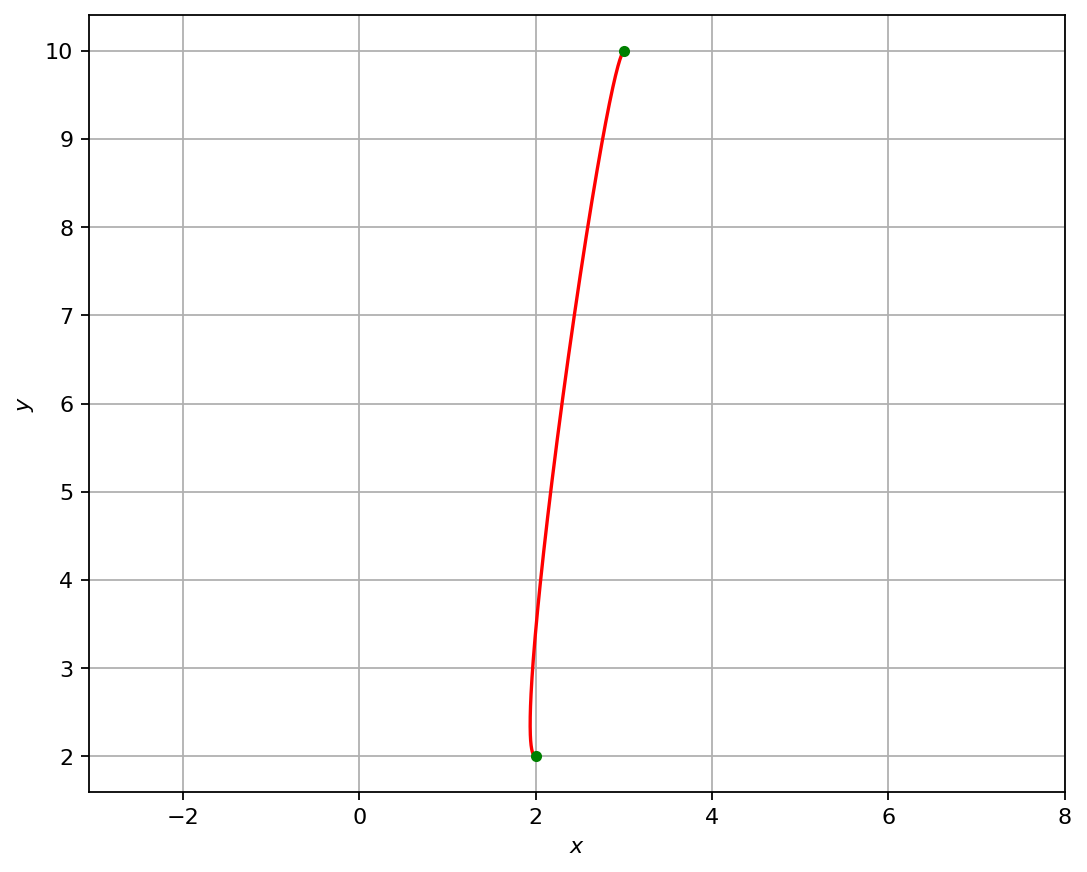

In [75]:
t = np.linspace(0, 10, 200)
waypoints = np.array([[2,2,np.pi], [3.,10., np.pi/4]])
k = 1# Initial and Final Speed
path = compute_path_from_waypoints(waypoints, k,t)
R1.set_initial_state([2, 2, np.pi])
R1.set_time(t)
R1.set_path(path)
plot_path(path)


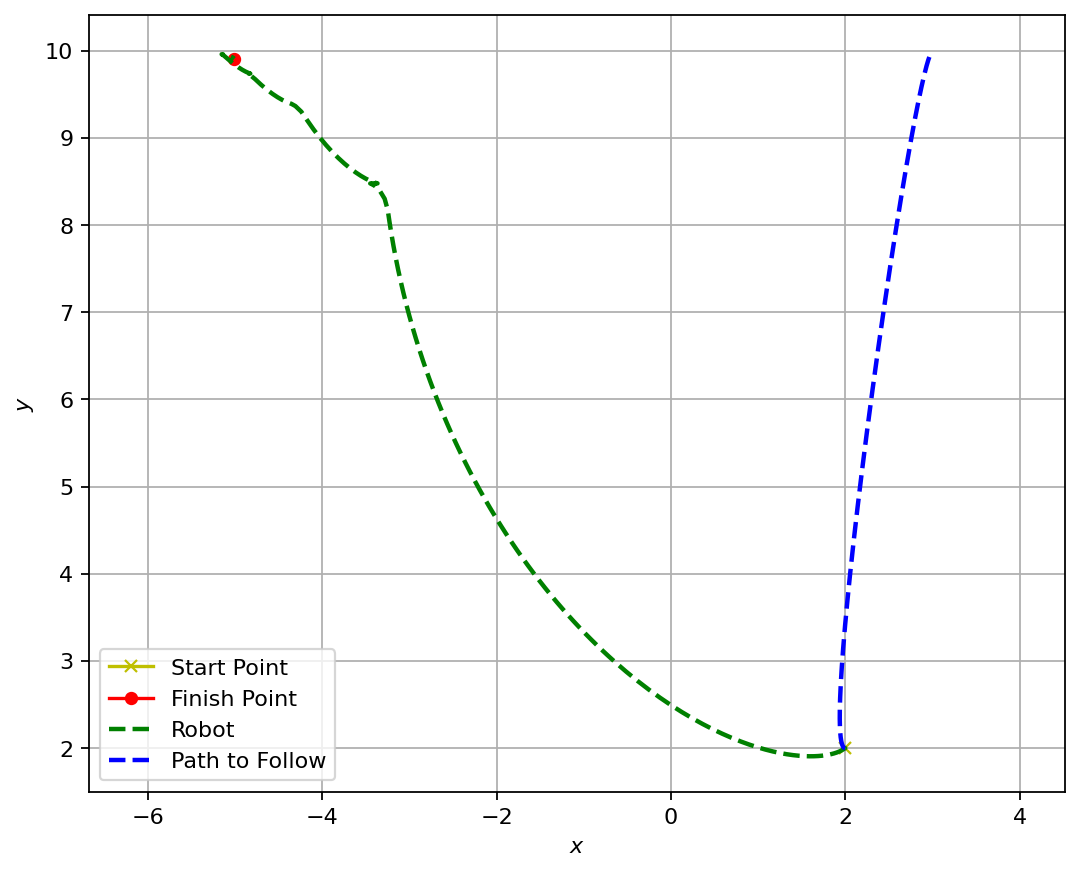

In [76]:
C4 = CartesianRegulator_Control(0.5,1)
R1.set_control_obj(C4)
R1.simulation()
plot_xy(R1.get_x(), R1.get_y(), path, None, None)


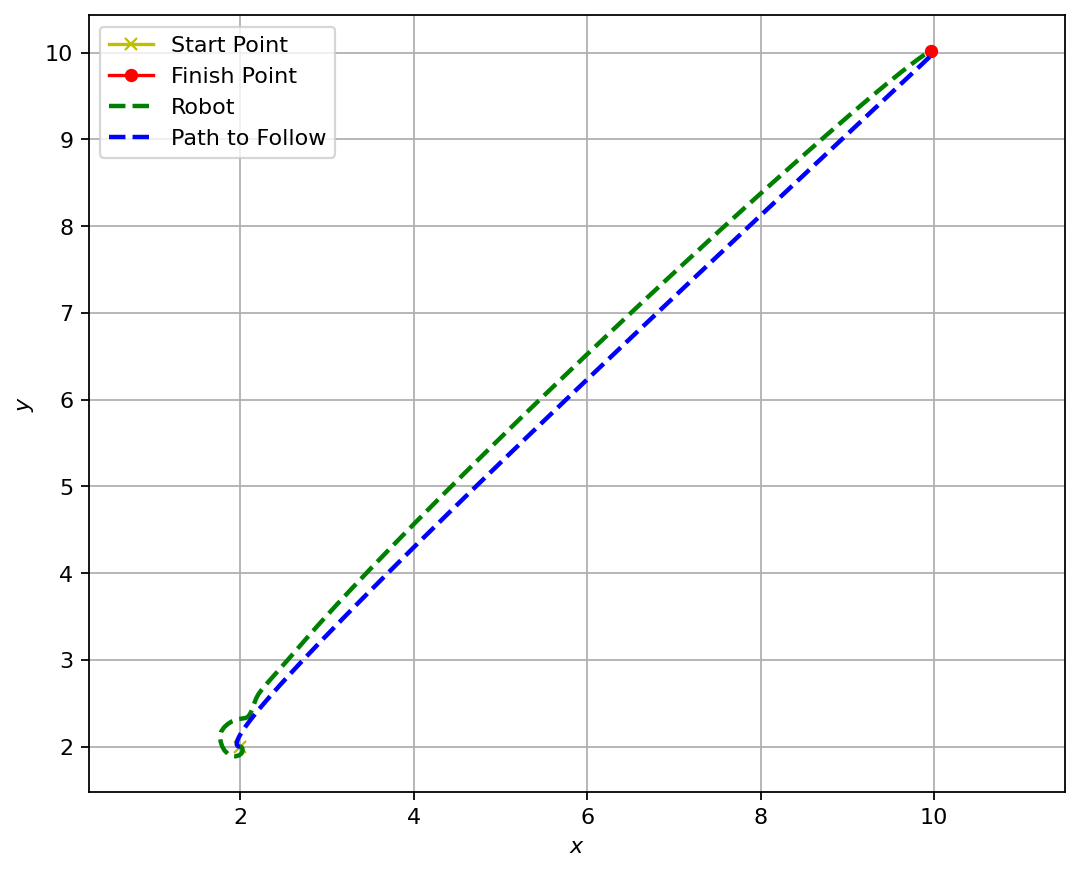

In [32]:
C5 = PolarRegulator_Control(6,0.5,11)
R1.set_control_obj(C5)
R1.set_initial_state(from_cartesian_to_polar([2, 2, np.pi]))
R1.simulation()
plot_xy(R1.get_x(), R1.get_y(), path, None, None)